### Trabajo Final Inferéncia Estadística
autor: Joan Benlloch

profesora: Mar Angulo

curso: 2023-2024

#### Objetivo
En este trabajo relizaremos un análisis de inferéncia estadística acerca del dataset de los pasajeros de titánic. Se dividirá en rtes bloques, el rpimero un estudio de inferencia paramétrica, a continuación usaremos métodos no paramétricos y por último aplicarmeos modelos y series temporales.

Cabe decir que en este documento de código python no entraremos en profundidad en el análisis y explicación de los resultados, para ello se ha creado un documento en formato pdf que se adjunta en la entrega.

In [2]:
#Importamos el dataset y librerías para el trabajo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos_titanic = pd.read_csv('./titanic/titanic3.csv')
#convertimos el dataset en un dataframe
titanic_df = pd.DataFrame(datos_titanic)
#mostramos las primeras filas del dataframe
print(titanic_df.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [3]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Inferencia Paramétrica

### Métodos no paramétricos

#### Constrate de Bondad de Ajuste

Hecho en R en el otro documento

Al estudiar la distribución de la podblación por si sigue una normal no podemos inferir en una población de todos los cruceros o barcos que hacen viajes, pero tal vez si que se puede hablar de los barcos de la misma compañía o de los barcos de la misma época o incluso de viajes a América en 1912, según las características y motivos de los viajeros para viajar en aquella época.

#### Prueba gráfica

Dado que el contraste de bondad de ajuste en R nos ha dicho que no sigue una distribución normal, vamos a realizar un contraste gráfico para ver la forma general de los datos y que nos diría la intuición si tuviésemos que comparar con otra distribución qeu ajuste la nuestra

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

In [6]:
#Configuro matplotlib como hemos visto en clase
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


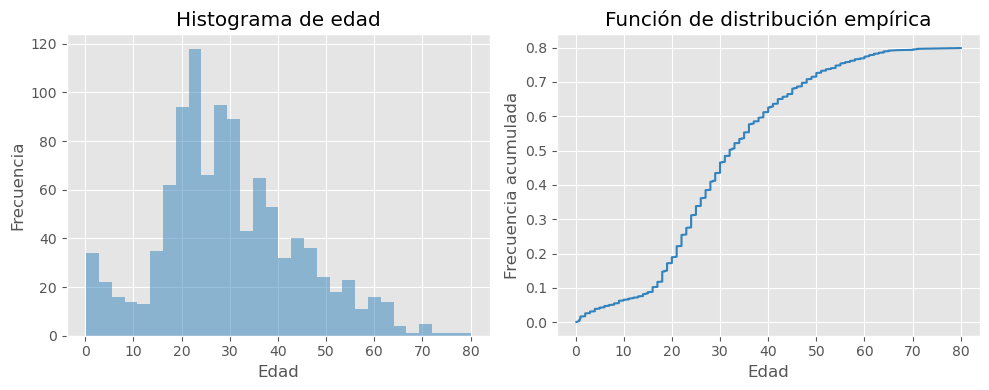

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
titanic_df['age'].hist(ax=axs[0], bins=30, color="#3182bd", alpha=0.5)
axs[0].set_title('Histograma de edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')


#Función de Distribución Acumulada

ecdf = ECDF(x=titanic_df['age'])
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Frecuencia acumulada')

plt.tight_layout()

# Ajuste por una distribución Normal


In [8]:
# Ajuste distribución normal

# 1) Definimos la distribución a la que pretendemos comprobar si se ajustan los datos
distribucion = stats.norm

# 2) Con el método fit() obtenemos los parámetros
parametros = distribucion.fit(data=titanic_df['age'].dropna())
# 3) Creamos un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))
parametros_dict

{'loc': 29.8811345124283, 'scale': 14.40660823421771}

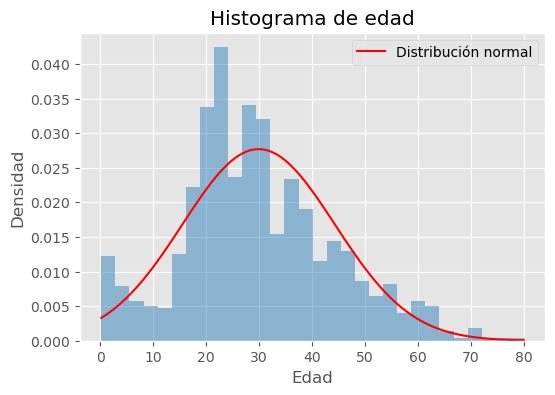

In [9]:
# 4) Gráfico
fig, ax = plt.subplots(figsize=(6, 4))
titanic_df['age'].hist(ax=ax, bins=30, color="#3182bd", alpha=0.5, density=True)
x = np.linspace(titanic_df['age'].min(), titanic_df['age'].max(), 100)
y = distribucion.pdf(x, *parametros)
ax.plot(x, y, color="red", label="Distribución normal")
ax.set_title('Histograma de edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Densidad')
ax.legend()


In [10]:
# 5) Métricas de bondad del ajuste

log_likelihood = distribucion.logpdf(titanic_df['age'].dropna(), *parametros).sum()

aic = -2*log_likelihood + 2*len(parametros)
bic = -2*log_likelihood + len(parametros)*np.log(len(titanic_df['age'].dropna()))


In [11]:
#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 29.8811345124283, 'scale': 14.40660823421771}
Log likelihood: -4274.610314500958
AIC:            8553.220629001917
BIC:            8563.126086291166


Como podemos ver el log_likelihood muy negativo nos indica que el modelo normal no describe la distribución de nuestras edades. 

### Ajuste simultáneo de varias distribuciones

Seguimos lo hecho en clase para encontrar que distrubución se ajustaría mejor la edad de nuestra muestra del titánic

In [12]:

from scipy import stats
import pandas as pd
import numpy as np
import tqdm
import inspect
import warnings
warnings.filterwarnings('ignore')

In [13]:
def seleccionar_distribuciones(familia='realall', verbose=True):
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion

In [14]:
x = titanic_df['age']
# Eliminamos los valores NaN e infinito
x.dropna()
x = x[~x.isin([np.nan, np.inf, -np.inf])]


In [15]:
def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados

In [16]:

# Ajuste y comparación de distribuciones

resultados = comparar_distribuciones(
                x=x,
                familia='realall',
                ordenar='aic',
                verbose=False
            )
resultados

1/32 Ajustando distribución: cauchy
2/32 Ajustando distribución: crystalball
3/32 Ajustando distribución: dgamma
4/32 Ajustando distribución: dweibull
5/32 Ajustando distribución: exponnorm
6/32 Ajustando distribución: genextreme
7/32 Ajustando distribución: genhyperbolic
8/32 Ajustando distribución: genlogistic
9/32 Ajustando distribución: gennorm
10/32 Ajustando distribución: gumbel_l
11/32 Ajustando distribución: gumbel_r
12/32 Ajustando distribución: hypsecant
13/32 Ajustando distribución: johnsonsu
14/32 Ajustando distribución: kappa4
15/32 Ajustando distribución: laplace
16/32 Ajustando distribución: laplace_asymmetric
17/32 Ajustando distribución: loggamma
18/32 Ajustando distribución: logistic
19/32 Ajustando distribución: loguniform
20/32 Ajustando distribución: moyal
21/32 Ajustando distribución: nct
22/32 Ajustando distribución: norm
23/32 Ajustando distribución: norminvgauss
24/32 Ajustando distribución: pearson3
25/32 Ajustando distribución: powernorm
26/32 Ajustando distr

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,genhyperbolic,-4255.499528,8520.999056,8545.762699,5,"{'p': 2.178894844386954, 'a': 3.38261432936648..."
1,skewnorm,-4258.230248,8522.460496,8537.318682,3,"{'a': 1.8783197456443594, 'loc': 15.6290136471..."
2,genextreme,-4259.167655,8524.335310,8539.193496,3,"{'c': 0.1688617056053091, 'loc': 24.1243973657..."
3,pearson3,-4259.990502,8525.981005,8540.839191,3,"{'skew': 0.4019614805073085, 'loc': 29.8811093..."
4,genlogistic,-4260.446125,8526.892250,8541.750436,3,"{'c': 2.1020783132234473, 'loc': 19.5164290409..."
5,norminvgauss,-4259.642399,8527.284799,8547.095713,4,"{'a': 7.729530010098099, 'b': 3.32439459887215..."
6,johnsonsu,-4259.888922,8527.777843,8547.588758,4,"{'a': -4.019376348703249, 'b': 4.8459642890292..."
7,nct,-4259.946381,8527.892761,8547.703676,4,"{'df': 35.84363636701261, 'nc': 6.686202787316..."
8,exponnorm,-4261.427776,8528.855552,8543.713738,3,"{'K': 0.8817258455290008, 'loc': 20.2381982831..."
9,powernorm,-4261.705318,8529.410636,8544.268822,3,"{'c': 0.16749073151042695, 'loc': 12.597536187..."


In [17]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    

    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print('---------------------')
    print('Resultados del ajuste')
    print('---------------------')
    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax


def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribuciones')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    
    for nombre in nombre_distribuciones:
        
        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(min(x), max(x), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    
    ax.legend();
    
    return ax
            

---------------------
Resultados del ajuste
---------------------
Distribución:   genhyperbolic
Dominio:        [-inf, inf]
Parámetros:     {'p': 2.178894844386954, 'a': 3.382614329366483e-05, 'b': 8.497762324390796e-06, 'loc': 22.379689820230496, 'scale': 0.00021716220589309616}
Log likelihood: -4255.499527850544
AIC:            8520.999055701088
BIC:            8545.762698924213


<Axes: title={'center': 'Ajuste distribución'}, xlabel='x', ylabel='Densidad de probabilidad'>

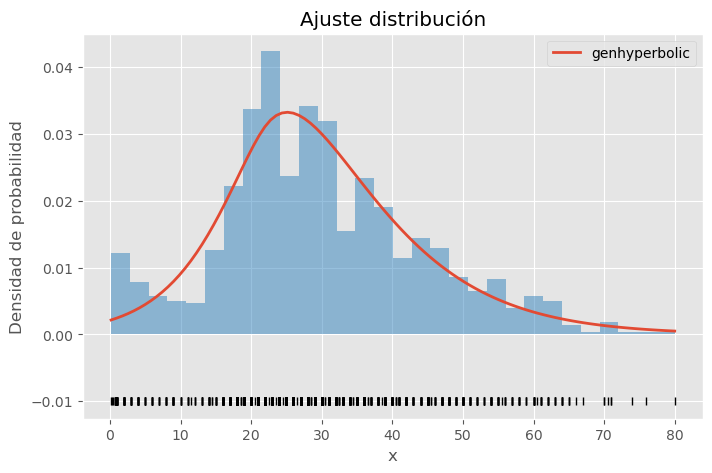

In [18]:
#Vamos a comprobar y representar cuál es la mejor distribución de acuerdo con la Cantidad de Información de Akaike
fig, ax = plt.subplots(figsize=(8,5))

plot_distribucion(
    x=x,
    nombre_distribucion=resultados['distribucion'][0],
    ax=ax
)

<Axes: title={'center': 'Ajuste distribuciones'}, xlabel='x', ylabel='Densidad de probabilidad'>

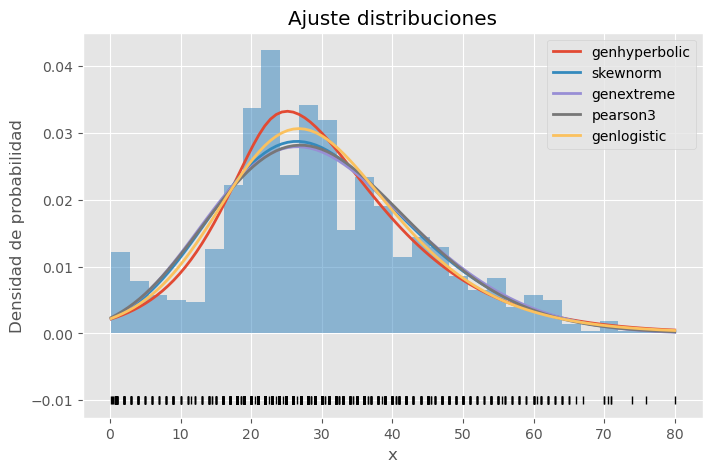

In [20]:
#y vamos a comprobar cómo queda el ajuste de las cinco mejores...
fig, ax = plt.subplots(figsize=(8,5))

plot_multiple_distribuciones(
    x=x,
    nombre_distribuciones=resultados['distribucion'][:5],
    ax=ax
)

Como podemos ver la distribución a la que mejor se ajustan nuestros datos, de la edad de la muestra del titánic es la distribución genhyperbolic. En caso de que tuviesemos que hacer estudios relativos a la edad procuraríamos usar esta distribución de forma aproximada.

### Contraste de Homogeneidad de Willcoxon y de Mann-Whitney

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon
from statsmodels.stats.anova import AnovaRM

En esta sección voy a comparar si hay homogeneidad entre el sexo de los pasajeros y el precio del tiquet que pagaron. Para ello voy a usar el contraste de homogeneidad de willcoxon y de Mann-Whitney.

In [5]:
titanic_df_no_na = titanic_df.dropna(subset=['sex', 'fare','age'])

In [ ]:
#guardo en un grupo a los hombres con lo que pagaron y en el otro las mujeres
m_fare = titanic_df_no_na[titanic_df_no_na.sex == "male"]
f_fare = titanic_df_no_na[titanic_df_no_na.sex == "female"]

In [ ]:
#compruebo que los tamaños sean iguales y si no lo son recorto para que tengan el mismo tamañp y poder aplicar willcoxon


In [ ]:
stat, p = mannwhitneyu(f_fare.fare, m_fare.fare, alternative='less')
print('p-value:', p)

p-value: 1.0


Hago un test de Wilcoxon para ver si hay diferencias significativas entre el precio del tiquet y el sexo de los pasajeros.

In [ ]:
#hago el test para 400 hombres y 400 mujeres, para que las muestras sean iguales
m_400 = m_fare[:400]
f_400 = f_fare[:400]

In [ ]:
f_400 = f_400.reset_index(drop=True)
m_400 = m_400.reset_index(drop=True)

In [ ]:
stat, p = wilcoxon(m_400.fare, f_400.fare, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: No hay diferencias significativas')
else:
	print('Rechazamos H0: Hay diferencias significativas')

Statistics=32521.500, p=0.041
Rechazamos H0: Hay diferencias significativas


Podemos decir después de los dos tests que hay diferencias significativas entre lo que pagaron hombres y mujeres, y además podemos decir que las mujeres pagaron más

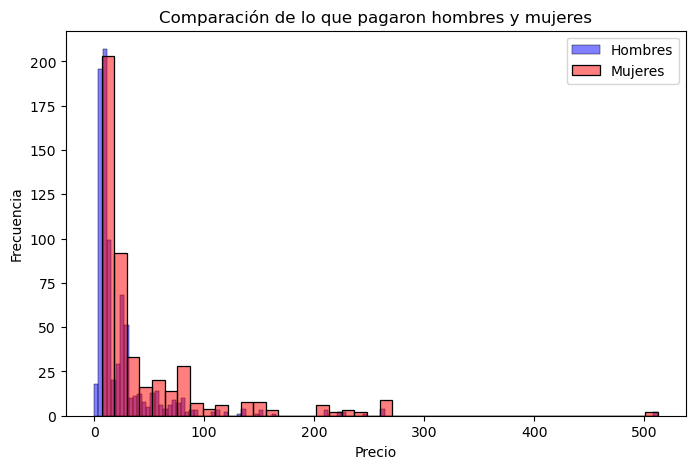

In [ ]:
#hago graficas de lo que pagaron hombres y mujeres y contrastar de forma gráfica que realmente la mujeres pagaron más:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(m_fare.fare, color='blue', alpha=0.5, ax=ax)
sns.histplot(f_fare.fare, color='red', alpha=0.5, ax=ax)
plt.legend(['Hombres', 'Mujeres'])
plt.title('Comparación de lo que pagaron hombres y mujeres')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


### Contraste de homogeneidad de mas de dos muestras

Contrasto si la edad en las tres clases del titánic proceden de la misma población. Mi H0 será que si.

In [6]:

from scipy.stats import kruskal

In [7]:
#separo el dataset en tres grupos dados por la clase a la que pertenecen
class1 = titanic_df_no_na[titanic_df_no_na.pclass == 1]
class2 = titanic_df_no_na[titanic_df_no_na.pclass == 2]
class3 = titanic_df_no_na[titanic_df_no_na.pclass == 3]


In [8]:
stat, p = kruskal(class1.age, class2.age, class3.age)
print(stat,p)

173.07483768708096 2.613825063985474e-38


In [9]:
#Aplicamos la corrección de Bonferroni
# Bonferroni: 3 comparaciones
alpha_2=0.05/3                          #Obtenemos el valor de significación que utilizaremos para las comparaciones
alpha_2

0.016666666666666666

In [13]:
stat, p = mannwhitneyu(class1.age, class2.age,alternative='two-sided')
print('p-value:', p)
if p > alpha_2:
	print('No rechazamos H0: No hay diferencias significativas entre los grupos 1 y 2.')
else:
	print('Rechazamos H0: Hay diferencias significativas entre los grupos 1 y 2.')

p-value: 8.078340942588266e-14
Rechazamos H0: Hay diferencias significativas entre los grupos 1 y 2.


In [15]:
stat, p = mannwhitneyu(class2.age, class3.age,alternative='two-sided')
print('p-value:', p)
if p > alpha_2:
	print('No rechazamos H0: No hay diferencias significativas entre los grupos 2 y 3.')
else:
	print('Rechazamos H0: Hay diferencias significativas entre los grupos 2 y 3.')

p-value: 4.7417379898130856e-07
Rechazamos H0: Hay diferencias significativas entre los grupos 2 y 3.


In [16]:
stat, p = mannwhitneyu(class1.age, class3.age,alternative='two-sided')
print('p-value:', p)
if p > alpha_2:
	print('No rechazamos H0: No hay diferencias significativas entre los grupos 1 y 3.')
else:
	print('Rechazamos H0: Hay diferencias significativas entre los grupos 1 y 3.')

p-value: 2.773204452582719e-38
Rechazamos H0: Hay diferencias significativas entre los grupos 1 y 3.


Vemos que las diferecias son significativas en edad entre las tres clases con el test de Kruskal-Wallis. Y analizando las clases dos a dos con el test de Mann-Whitney vemos que todas ellas son diferentes. 

In [ ]:
#muestro la media de edad de cada clase
(class1.age).mean()


39.15991795774648

In [ ]:
(class2.age).mean()

29.506704980842912

In [ ]:
class3.age.mean()

24.745

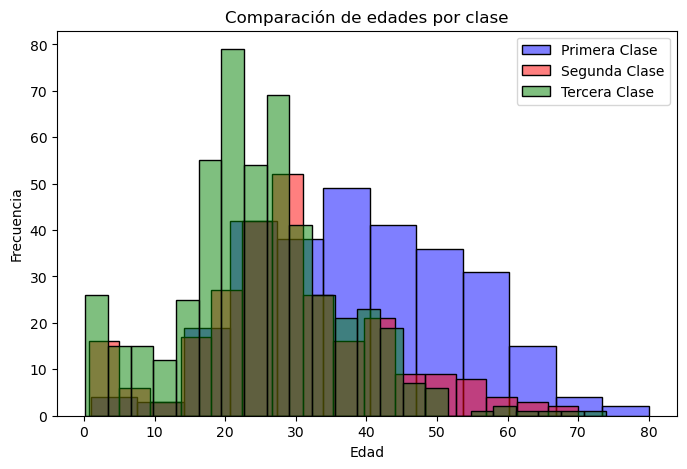

In [17]:
#Grafico las distribuciones de edades

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(class1.age, color='blue', alpha=0.5, ax=ax)
sns.histplot(class2.age, color='red', alpha=0.5, ax=ax)
sns.histplot(class3.age, color='green', alpha=0.5, ax=ax)
plt.legend(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
plt.title('Comparación de edades por clase')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Podemos hacer el test de Kruskal Wallis para comparar el precio pagado entre los pasajero de distintas clases, pero claramente nos va a dar distinto, ya que ese el motivo principal de diferencia entre clases.

In [ ]:
stat, p = kruskal(class1.fare, class2.fare, class3.fare)
print(stat,p)

602.4393587194828 1.5203914315752115e-131


### Modelos y Series Temporales

Modelo Logit

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [23]:
#Primero paso el campo de sexo en el dataset a numérico para poder usarlo en las prediciones

label_encoder = LabelEncoder()
datos_titanic['sex_num'] = label_encoder.fit_transform(datos_titanic['sex'])

datos_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_num
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [24]:
datos_titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,sex_num
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,119.000000,1045.000000
mean,2.206699,0.408612,29.851834,0.503349,0.421053,36.686080,160.033613,0.628708
std,0.841542,0.491813,14.389201,0.912471,0.840052,55.732533,98.082975,0.483382
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,71.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000,155.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000,255.500000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1.000000


In [25]:
# De forma muy simple voy eliminar las filas de las variables que voy a usar para 
#entrenar el modelo que continene un NaN


datos_titanic = datos_titanic.dropna(subset=['age'])
datos_titanic = datos_titanic.dropna(subset=['pclass'])
datos_titanic = datos_titanic.dropna(subset=['sibsp'])
datos_titanic = datos_titanic.dropna(subset=['parch'])
datos_titanic = datos_titanic.dropna(subset=['fare'])




In [26]:
datos_titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,sex_num
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,119.000000,1045.000000
mean,2.206699,0.408612,29.851834,0.503349,0.421053,36.686080,160.033613,0.628708
std,0.841542,0.491813,14.389201,0.912471,0.840052,55.732533,98.082975,0.483382
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,71.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000,155.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000,255.500000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1.000000


In [28]:

# Seleccionamos las características y la variable objetivo
features = ['pclass', 'age', 'sex_num', 'sibsp', 'parch', 'fare']
X = datos_titanic[features]
y = datos_titanic['survived']


X.head()

,pclass,age,sex_num,sibsp,parch,fare
0,1.0,29.0000,0,0.0,0.0,211.3375
1,1.0,0.9167,1,1.0,2.0,151.5500
2,1.0,2.0000,0,1.0,2.0,151.5500
3,1.0,30.0000,1,1.0,2.0,151.5500
4,1.0,25.0000,0,1.0,2.0,151.5500


In [29]:
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [30]:
# Instanciamos el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)

LogisticRegression()

In [32]:
# Obtenemos los pesos de las características
feature_weights = model.coef_[0]

# Obtenemos la desviación estándar de los coeficientes
std_dev = np.std(X, 0) * feature_weights

# Mostramos los pesos de las características junto con la desviación estándar
for feature, weight, std in zip(features, feature_weights, std_dev):
    print(f"{feature}:    \t Weight={weight},\t Standard deviation={std}")

pclass:    	 Weight=-1.0688115380285343,	 Standard deviation=-0.8990191448588883
age:    	 Weight=-0.037684503934559965,	 Standard deviation=-0.5419903889938679
sex_num:    	 Weight=-2.4680958516026656,	 Standard deviation=-1.1924612609884937
sibsp:    	 Weight=-0.3443743827383492,	 Standard deviation=-0.31408132456931076
parch:    	 Weight=0.05816679674481951,	 Standard deviation=0.04883972351129413
fare:    	 Weight=0.0017909418131150149,	 Standard deviation=0.09976595483188586


A primera vista podemos intuir que las variables que más influencia tienen en si un pasajero se salvaba o no son el sexo, la clase y si tenía familiares a bordo.

In [33]:
#Calculamos su valor z
z = feature_weights / std_dev

#Mostramos el valor z
for feature, z_value in zip(features, z):
    print(f"{feature}:    \t z_value={z_value}")
    

pclass:    	 z_value=1.1888640460446445
age:    	 z_value=0.069529837982028
sex_num:    	 z_value=2.0697492927835084
sibsp:    	 z_value=1.096449727504742
parch:    	 z_value=1.1909730965485197
fare:    	 z_value=0.01795143259173838


In [34]:
#sacamos el p-valor
from scipy.stats import norm

p_values = 2 * (1 - norm.cdf(np.abs(z)))

#Mostramos el p-valor
for feature, p_value in zip(features, p_values):
    print(f"{feature}:    \t p_value={p_value}")


pclass:    	 p_value=0.23449317033225014
age:    	 p_value=0.9445678828426143
sex_num:    	 p_value=0.038475828092960684
sibsp:    	 p_value=0.2728820122477069
parch:    	 p_value=0.23366414662817192
fare:    	 p_value=0.9856775983365986


sabiendo ahora el p-valor, podemos decir que la variable que más influye en si un pasajero se salvaba o no es el sexo, seguido de la clase y si tenía familiares a bordo.

Pero la única relevante con un p-valor menor a 0.05 es el sexo. Y las que se pdrían descartar son la edad y lo que pagó por el tiquet.

In [44]:
#calculamos ahora la probabilidad de que un pasajero sobreviva, considerando que 
#es un hombre de 30 años de segunda clase, sin hermanos, sin padres, y que pagó 100 libras

probabilidad = model.predict_proba([[1, 16, 3, 0, 0, 100]])[0][1]

print(f"La probabilidad de que sobreviva es de {probabilidad * 100:.2f}%")

La probabilidad de que sobreviva es de 1.39%


c:\Users\joanb\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Eliminamos las variables que no son significativas

features_filtered = ['pclass', 'sex_num', 'sibsp', 'parch']
X_filtered = datos_titanic[features_filtered]


model_filtered = LogisticRegression()
model_filtered.fit(X_filtered, y)

# Obtenemos los pesos de las características

feature_weights_filtered = model_filtered.coef_[0]
std_dev_filtered = np.std(X_filtered, 0) * feature_weights_filtered

# Mostramos los pesos de las características junto con la desviación estándar

for feature, weight, std in zip(features_filtered, feature_weights_filtered, std_dev_filtered):
    print(f"{feature}:    \t Weight={weight},\t Standard deviation={std}")



pclass:    	 Weight=-0.8355968636008496,	 Standard deviation=-0.7028531701172088
sex_num:    	 Weight=-2.475069597885323,	 Standard deviation=-1.1958306286249374
sibsp:    	 Weight=-0.2208515736115964,	 Standard deviation=-0.20142425874299036
parch:    	 Weight=0.10456600841570661,	 Standard deviation=0.08779879975353133


In [ ]:
#sacamos el nuevo p-valor

z_filtered = feature_weights_filtered / std_dev_filtered

p_values_filtered = 2 * (1 - norm.cdf(np.abs(z_filtered)))

#mostramos el p-valor

for feature, p_value in zip(features_filtered, p_values_filtered):
    print(f"{feature}:    \t p_value={p_value}")
                    

pclass:    	 p_value=0.23449317033225014
sex_num:    	 p_value=0.038475828092960684
sibsp:    	 p_value=0.2728820122477069
parch:    	 p_value=0.23366414662817192


In [ ]:
#calculamos ahora la probabilidad de que un pasajero sobreviva, considerando que
#es un hombre de segunda clase, sin hermanos, sin padres

probabilidad_filtered = model_filtered.predict_proba([[1, 2, 0, 0]])[0][1]

print(f"La probabilidad de que sobreviva es de {probabilidad_filtered * 100:.2f}%")

La probabilidad de que sobreviva es de 5.76%


c:\Users\joanb\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Personalmente creo que el primer modelo hace mejores predicciones. Porque aunque las características del tíquet y la edad no fuesen muy influyentes, al final se ajusta mejor y retorna predicciones que tienen más sentido. Ya que creo que decir que tener hijos, pareja o familiares en general no afecta mucho como ocurre en el segundo modelo, en el que ocurre que estar casado es negativo es claramente erróneo.

-----------------------

Hasta aquí el código de la práctica. Las conclusiones y análisis en detalle en el documento pdf